In [99]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io.wavfile import read as readWav
from scipy.io.wavfile import write as writeWav
from scipy.signal import spectrogram
from scipy.fftpack import fft, ifft

from scipy.signal import butter, lfilter, freqz, filtfilt

# want 195 Hz low pass

def lowPass(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normed_cutoff = cutoff / nyquist
    b, a = butter(order, normed_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    yalt = filtfilt(b, a, data)
    return yalt

def getWav(name):
    fs, audio = readWav(name)
    tStep = 1.0/fs
    t = [tStep*n for n in range(len(audio))]
    return fs, audio, t

#def saveWave(data, fs, name):
#    writeWav(fname, fs, data)
    

audio = getWav("heartbeat-sounds/set_a/normal__201106141148.wav")

filteredAudio = lowPass(audio[1], 195, audio[0])

writeWav("heartbeat-sounds-filtered/set_a/normal_201106141148_filtered.wav", audio[0], filteredAudio)
writeWav("heartbeat-sounds-filtered/set_a/normal_201106141148.wav", audio[0], audio[1])
#audio = readWav("heartbeat-sounds/set_a/normal__201106141148.wav")


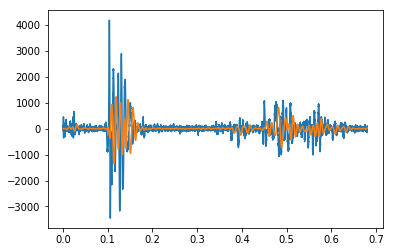

In [94]:
plt.plot(audio[2][:30000], audio[1][:30000])
plt.plot(audio[2][:30000], filteredAudio[:30000])
plt.show()

/home/Kyle/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


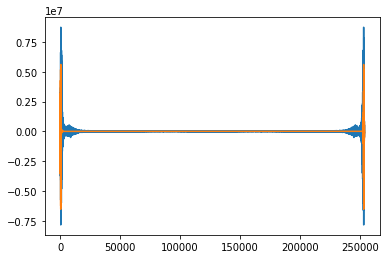

In [96]:
audioFreq = fft(audio[1])
audioFiltFreq = fft(filteredAudio)
plt.plot(audioFreq)
plt.plot(audioFiltFreq)
plt.show()

audio signal length  253544
frequency points  513


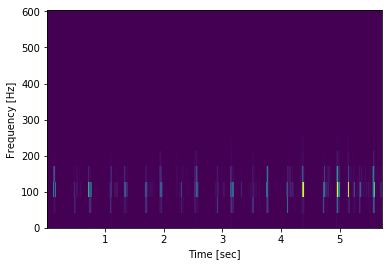

In [98]:
print ("audio signal length ", len(audio[1]))
f, t, audioSpec = spectrogram(filteredAudio, fs=audio[0], nperseg=1024)
print ("frequency points ", len(audioSpec))

ax = plt.pcolormesh(t, f[:15], audioSpec[:15, ::])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()